<h1>TASK 1</h1>

<a name='000'></a>

<h2>Content</h2>

<ul>
    <ol type='1'>
    <li><a href='#001'>Environment Configuration</a></li>
    <li><a href='#002'>Training 4 Different Classifiers</a></li>
    <li><a href='#003'>Calculating Metrics</a></li>
    <li><a href='#004'>Plotting Metric Curves</a></li>
    <li><a href='#005'>Training Classifier That Avoids Type II Errors and Calculating Metrics</a></li>
    </ol>
</ul>

<a name='001'></a>

<h2>Environment Configuration</h2>

Importing environment.

In [1]:
from sklearn import metrics, tree, ensemble
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

<a name='002'></a>

<h2>Training 4 Different Classifiers</h2>

Data loading.

>`activity` — target.
>
>`d1` ... `d1776` — predictors.

In [2]:
df = pd.read_csv('bioresponse.csv')
df.rename(str.lower, axis='columns', inplace=True)
df.head()

,activity,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d1767,d1768,d1769,d1770,d1771,d1772,d1773,d1774,d1775,d1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


Data splitting into training and test sets.

In [3]:
train_set, test_set = train_test_split(df, train_size=0.8, shuffle=True)

train_x = train_set.iloc[:, 1:]
train_y = train_set.iloc[:, :1]

test_x = test_set.iloc[:, 1:]
test_y = test_set.iloc[:, :1]

Size checking.

In [4]:
print('Training Set')
print('X size: {}, Y size: {}'.format(train_x.shape, train_y.shape))
print('Test Set')
print('X size: {}, Y size: {}'.format(test_x.shape, test_y.shape))

Training Set
X size: (3000, 1776), Y size: (3000, 1)
Test Set
X size: (751, 1776), Y size: (751, 1)


Building function to train models.

In [5]:
def fit_model(model, train_data, test_data):
    model.fit(train_data[0], train_data[1])
    
    logits = model.predict(test_data[0])
    probas = model.predict_proba(test_data[0])
    
    print(metrics.classification_report(y_true=test_data[1], y_pred=logits))
    
    return test_data[1], probas[:, 1]

<a name='003'></a>

<h2>Calculating Metrics</h2>

Training `DecisionTreeClassifier` model with `max_depth` of 3.

In [6]:
tcl3_true, tcl3_score = fit_model(
    model=tree.DecisionTreeClassifier(max_depth=3),
    train_data=(train_x, train_y),
    test_data=(test_x, test_y)
)

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       342
           1       0.78      0.80      0.79       409

    accuracy                           0.77       751
   macro avg       0.77      0.76      0.76       751
weighted avg       0.77      0.77      0.77       751



Training `RandomForestClassifier` ensemble with `max_depth` of 3.

In [7]:
fcl3_true, fcl3_score = fit_model(
    model=ensemble.RandomForestClassifier(max_depth=3),
    train_data=(train_x, train_y),
    test_data=(test_x, test_y)
)

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       342
           1       0.74      0.78      0.76       409

    accuracy                           0.73       751
   macro avg       0.73      0.72      0.72       751
weighted avg       0.73      0.73      0.73       751



Training `DecisionTreeClassifier` model with `max_depth` of 27.

In [8]:
tcl27_true, tcl27_score = fit_model(
    model=tree.DecisionTreeClassifier(max_depth=27),
    train_data=(train_x, train_y),
    test_data=(test_x, test_y)
)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       342
           1       0.73      0.74      0.73       409

    accuracy                           0.71       751
   macro avg       0.71      0.71      0.71       751
weighted avg       0.71      0.71      0.71       751



Training `RandomForestClassifier` ensemble with `max_depth` of 27.

In [9]:
fcl27_true, fcl27_score = fit_model(
    model=ensemble.RandomForestClassifier(max_depth=27),
    train_data=(train_x, train_y),
    test_data=(test_x, test_y)
)

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       342
           1       0.82      0.80      0.81       409

    accuracy                           0.79       751
   macro avg       0.79      0.79      0.79       751
weighted avg       0.79      0.79      0.79       751



<a name='004'></a>

<h2>Plotting Metric Curves</h2>

Building function to visualize results.

In [10]:
def plot_metric(y_true, y_score):
    figure, ax = plt.subplots(1, 2, figsize=(20, 5))
    sns.set_theme(style='whitegrid', palette='pastel')
    
    pr = metrics.precision_recall_curve(y_true, y_score)
    roc = metrics.roc_curve(y_true, y_score)
    
    ax[0] = sns.lineplot(pr[0], pr[1], ax=ax[0])
    ax[0].set(xlabel='Recall')
    ax[0].set(ylabel='Precision')
    ax[0].set_title('Precision-Recall Curve')
    
    ax[1] = sns.lineplot(roc[0], roc[1], ax=ax[1])
    ax[1] = sns.lineplot(roc[1], roc[1], ax=ax[1], linestyle='--')
    ax[1].set(xlabel='False Positive Rate')
    ax[1].set(ylabel='True Positive Rate')
    ax[1].set_title('Receiver Operating Characteristic')
    
    plt.show()

Results of `DecisionTreeClassifier` training with `max_depth` of 3.

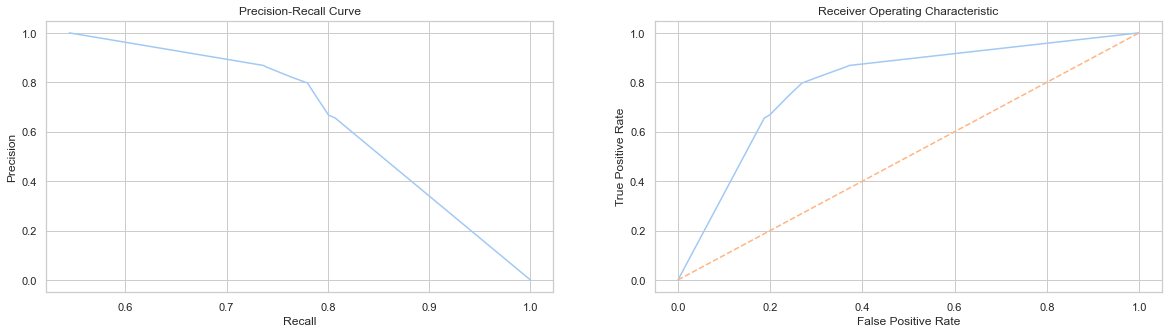

In [12]:
plot_metric(tcl3_true, tcl3_score)

Results of `RandomForestClassifier` training with `max_depth` of 3.

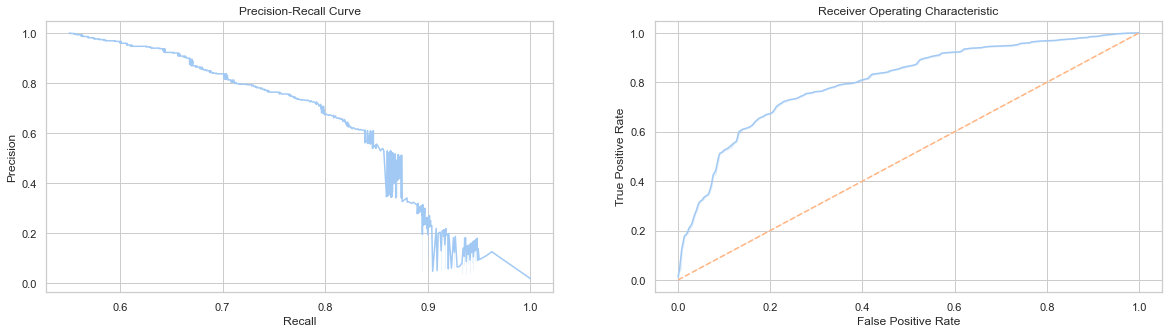

In [13]:
plot_metric(fcl3_true, fcl3_score)

Results of `DecisionTreeClassifier` training with `max_depth` of 27.

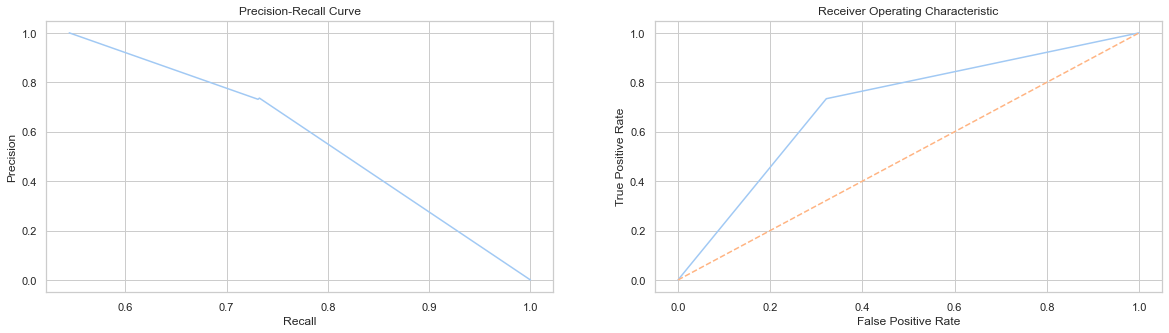

In [14]:
plot_metric(tcl27_true, tcl27_score)

Results of `RandomForestClassifier` training with `max_depth` of 27.

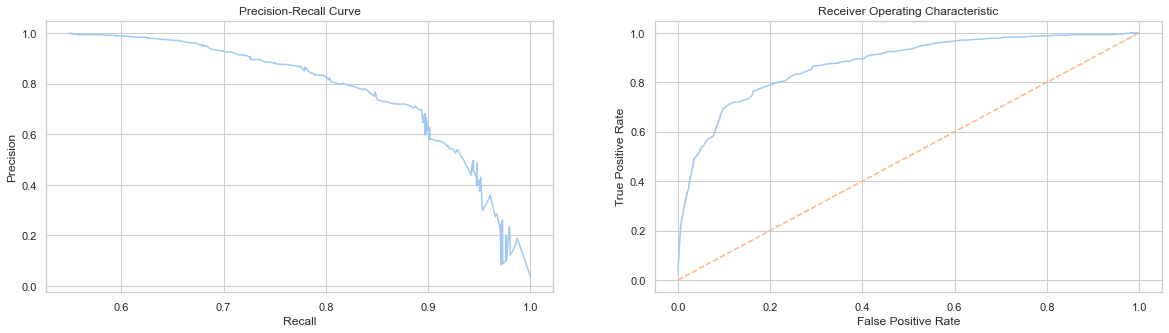

In [15]:
plot_metric(fcl27_true, fcl27_score)

<a name='005'></a>

<h2>Training Classifier That Avoids Type II Errors and Calculating Metrics</h2>

Training `RandomForestClassifier` ensemble with `max_depth` of 30 and class rebalancing.

In [17]:
fcl30_true, fcl30_score = fit_model(
    model=ensemble.RandomForestClassifier(max_depth=30, class_weight={0 : 0.5, 1 : 1.5}),
    train_data=(train_x, train_y),
    test_data=(test_x, test_y)
)

              precision    recall  f1-score   support

           0       0.78      0.82      0.79       342
           1       0.84      0.80      0.82       409

    accuracy                           0.81       751
   macro avg       0.81      0.81      0.81       751
weighted avg       0.81      0.81      0.81       751



Results of `RandomForestClassifier` training with `max_depth` of 30 and class rebalancing.

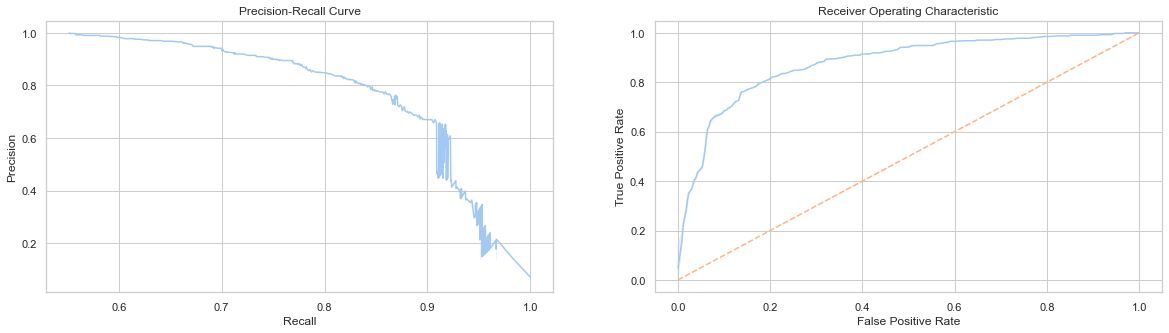

In [18]:
plot_metric(fcl30_true, fcl30_score)